In [16]:
import splitfolders
import torch.nn as nn
import torch
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.io import read_image
from torch.utils.data import Dataset
import cv2
import os, os.path
import pandas as pd
import string    
import random 
import shutil
import torchvision
import time
from torch.optim import lr_scheduler

#### Antes de realizar a tarefa 1, é necessário fazer alguns pré- processamentos, pois algumas imagens estão dando problemas para o Pytorch e por isso irei excluir este imagens, que não vai afetar o processo geral porque são poucas imagens(20, 25 imagens).

#### Logo, irei fazer a tarefa 2 primeiro, que já cuida dessa parte. Através da classe do pytorch para ler a imagem eu consigo ver se a imagem é problemática ou não, com isso eu decidi excluir se a imagem for. 

# Tarefa 2

#### Algumas imagens tem os mesmo nomes, então eu estou renomeando todas aleatoriamente.

In [17]:
DIR1="todas_imagens\\Darth Vader"
files1=[name for name in os.listdir(DIR1) if os.path.isfile(os.path.join(DIR1, name))]
DIR2="todas_imagens\\Stormtrooper"
files2=[name for name in os.listdir(DIR2) if os.path.isfile(os.path.join(DIR2, name))]
DIR3="todas_imagens\\Yoda"
files3=[name for name in os.listdir(DIR3) if os.path.isfile(os.path.join(DIR3, name))]

In [18]:
for i in files1:
    ran = ''.join(random.choices(string.ascii_uppercase + string.digits, k = 30))    
    os.rename("todas_imagens\\Darth Vader\\"+i,str("todas_imagens\\Darth Vader\\"+ran+".jpg"))    

for i in files2:
    ran = ''.join(random.choices(string.ascii_uppercase + string.digits, k = 30))    
    os.rename("todas_imagens\\Stormtrooper\\"+i,str("todas_imagens\\Stormtrooper\\"+ran+".jpg"))    

for i in files3:
    ran = ''.join(random.choices(string.ascii_uppercase + string.digits, k = 30))    
    os.rename("todas_imagens\\Yoda\\"+i,str("todas_imagens\\Yoda\\"+ran+".jpg"))    

In [19]:
# Exemplo do nome
ran = ''.join(random.choices(string.ascii_uppercase + string.digits, k = 30))    
print("The randomly generated string is : " + str(ran+".jpg")) # print the random data

The randomly generated string is : YR21S46TCRHEI10YE48PB145G2L0VP.jpg


#### Classe que irei usar para o Pytorch, futuramente terá um arquivo com os nomes dos arquivos e suas respectivas classes, e com isso eu irei carregar as imagens de treino, validação e teste. Além disso, através dela é que será possível verificar se uma imagem é problemática ou não, a partir daí eu decido excluir ou não.

In [20]:
class ImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = annotations_file
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

#### Transformações usadas nas imagens, escolhi transformar elas em cinza e em seguida reduzir o tamanho para 140 linhas e 140 colunas.

In [21]:
transform_imgs = transforms.Compose([
transforms.Grayscale(), transforms.CenterCrop(140)])

#### Existem algumas imagens problemáticas na classe Stormtrooper e Yoda. Logo, vou excluir essas imagens para continuar o processo.

In [22]:
#Classe Stormtrooper
DIR1="todas_imagens\\Stormtrooper"
storm=[name for name in os.listdir(DIR1) if os.path.isfile(os.path.join(DIR1, name))]
storm=pd.DataFrame(np.column_stack((storm,np.array([0]*len(storm)))),columns=["nome_arquivo","classe"])
storm_imgs=ImageDataset(storm, DIR1, transform_imgs)

cont=0
for i in range(len(storm_imgs)):
    try:
        print(storm_imgs[i][0].shape) 
    except:
        cont=cont+1
        print(i)
        img_exc="todas_imagens\\Stormtrooper\\"+storm.iloc[i,0]
        os.remove(img_exc)
#Quantidade de imagens excluidas        
print("A quantidade de imgs problematicas eh: ", cont)

torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([

torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([

In [23]:
#Classe Yoda
DIR1="todas_imagens\\Yoda"
yoda=[name for name in os.listdir(DIR1) if os.path.isfile(os.path.join(DIR1, name))]
yoda=pd.DataFrame(np.column_stack((yoda,np.array([0]*len(yoda)))),columns=["nome_arquivo","classe"])
yoda_imgs=ImageDataset(yoda, DIR1, transform_imgs)

cont=0
for i in range(len(yoda_imgs)):
    try:
        print(yoda_imgs[i][0].shape)
    except:
        cont=cont+1
        print(i)
        img_exc="todas_imagens\\Yoda\\"+yoda.iloc[i,0]
        os.remove(img_exc)
print("A quantidade de imgs problematicas eh: ", cont)


torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
11
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
24
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.

torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
342
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Size([1, 140, 140])
torch.Si

# 1 tarefa

#### Essa função realiza a separação das classes de uma forma bastante simples. Ela cria três pastas: train, val e test. Para cada uma são criadas as pastas de cada classe contendo as imagens. Basta fornecer os diretórios de entrada e saída.

In [24]:
splitfolders.ratio("todas_imagens", output="divisoes", seed=7, ratio=(0.7, 0.15,0.15))

Copying files: 1799 files [00:12, 141.21 files/s]


# 3 tarefa

#### Agora, eu tenho que fazer um data frame pandas com duas colunas. A primeira, sendo o nome do arquivo da imagem e a segunda coluna sendo a classe da imagem. Depois, eu posso usar a classe para ler cada conjunto de imagens de treinamento, validação e teste. 

#### Dataset de treino

In [25]:
DIR1="divisoes\\train\\Darth Vader"
darth_train=[name for name in os.listdir(DIR1) if os.path.isfile(os.path.join(DIR1, name))]
for i in darth_train:  
    shutil.copyfile(DIR1+"\\"+i,"train\\"+i) 

darth_train=np.column_stack((darth_train,np.array([0]*len(darth_train))))

DIR2="divisoes\\train\\Stormtrooper"
storm_train=[name for name in os.listdir(DIR2) if os.path.isfile(os.path.join(DIR2, name))]
for i in storm_train:  
    shutil.copyfile(DIR2+"\\"+i,"train\\"+i) 

storm_train=np.column_stack((storm_train,np.array([1]*len(storm_train))))

DIR3="divisoes\\train\\Yoda"
yoda_train=[name for name in os.listdir(DIR3) if os.path.isfile(os.path.join(DIR3, name))]
for i in yoda_train:  
    shutil.copyfile(DIR3+"\\"+i,"train\\"+i)
    

yoda_train=np.column_stack((yoda_train,np.array([2]*len(yoda_train))))

train=pd.DataFrame(np.row_stack((darth_train, storm_train, yoda_train)),columns=["nome_arquivo","classe"])

In [26]:
train

,nome_arquivo,classe
0,09QOG9595VK2SUI8MLH39WEKFJO6T6.jpg,0
1,0C2JUULO3JEZZWUQI8CFA830CNSGBY.jpg,0
2,0D8JE8VYG26SSQNB5CSS5VLD1JJA0O.jpg,0
3,0HAMYDH5AF3BA9E9DIILZYLZZT4M3N.jpg,0
4,0JC1XXP4QVPQV0MZW844X2FGMAO7BB.jpg,0
...,...,...
1253,ZAMSRNMQ7Y6BK56S9CB4W9I3VYT5OV.jpg,2
1254,ZN58L24J28X4WJI9K2W19FPRKZLMH9.jpg,2
1255,ZQGX3YNUHDLQSGEWRD8QVLEZQJDMHW.jpg,2
1256,ZSWHH2ZY0UJKJVDTWQT0BCPOGVBMT6.jpg,2


#### Dataset de validação

In [27]:
DIR1="divisoes\\val\\Darth Vader"
darth_val=[name for name in os.listdir(DIR1) if os.path.isfile(os.path.join(DIR1, name))]
for i in darth_val:  
    shutil.copyfile(DIR1+"\\"+i,"val\\"+i)  

darth_val=np.column_stack((darth_val,np.array([0]*len(darth_val))))

DIR2="divisoes\\val\\Stormtrooper"
storm_val=[name for name in os.listdir(DIR2) if os.path.isfile(os.path.join(DIR2, name))]
for i in storm_val:  
    shutil.copyfile(DIR2+"\\"+i,"val\\"+i)
storm_val=np.column_stack((storm_val, np.array([1]*len(storm_val))))

DIR3="divisoes\\val\\Yoda"
yoda_val=[name for name in os.listdir(DIR3) if os.path.isfile(os.path.join(DIR3, name))]
for i in yoda_val:  
    shutil.copyfile(DIR3+"\\"+i,"val\\"+i)
yoda_val=np.column_stack((yoda_val, np.array([2]*len(yoda_val))))

val=pd.DataFrame(np.row_stack((darth_val, storm_val, yoda_val)),columns=["nome_arquivo","classe"])

In [28]:
val

,nome_arquivo,classe
0,01AA7THV8XLSYB03H5ER3EU4G8GGTS.jpg,0
1,0FD1H9OE8APS591H6KZD1ARRW8MO70.jpg,0
2,0PODFNND4BDHYIITNLOJX3NSNWHQXJ.jpg,0
3,12T431ERHQF5FCRV1IJRUOUII2CAF1.jpg,0
4,13YDXMIOER9XKX2A66RI14ZOA1RW2T.jpg,0
...,...,...
263,WZPIPC5FFJOXZKR4TMI5IML39OAQT6.jpg,2
264,X1E7QBYIFP5GT9C6OL95GN2DRDF1DH.jpg,2
265,Y4RQXFFDU0F6H1TXICFCZ1746L5G9H.jpg,2
266,ZGVBQS0VT5H9ACKHTT76KBY85OJ780.jpg,2


#### Dataset de teste

In [29]:
DIR1="divisoes\\test\\Darth Vader"
darth_test=[name for name in os.listdir(DIR1) if os.path.isfile(os.path.join(DIR1, name))]
for i in darth_test:  
    shutil.copyfile(DIR1+"\\"+i,"test\\"+i) 
darth_test=np.column_stack((darth_test,np.array([0]*len(darth_test))))

DIR2="divisoes\\test\\Stormtrooper"
storm_test=[name for name in os.listdir(DIR2) if os.path.isfile(os.path.join(DIR2, name))]
for i in storm_test:  
    shutil.copyfile(DIR2+"\\"+i,"test\\"+i) 

storm_test=np.column_stack((storm_test,np.array([1]*len(storm_test))))

DIR3="divisoes\\test\\Yoda"
yoda_test=[name for name in os.listdir(DIR3) if os.path.isfile(os.path.join(DIR3, name))]
for i in yoda_test:  
    shutil.copyfile(DIR3+"\\"+i,"test\\"+i)

yoda_test=np.column_stack((yoda_test,np.array([2]*len(yoda_test))))

test=pd.DataFrame(np.row_stack((darth_test, storm_test, yoda_test)),columns=["nome_arquivo","classe"])

In [30]:
test

,nome_arquivo,classe
0,1XSBL6H3VISD8GBTU8SWOXA1ILYJQW.jpg,0
1,25DQQ0Q3KI35AJMOBEMBJKRUBO8BE0.jpg,0
2,2C2YXTBAFM1Z55N57M5V10DQ92B7TR.jpg,0
3,2JTPJ742C9LOFPV2QIWACY8XA7VQ7Y.jpg,0
4,2K0X394DU34ZGKW0DKJXFMNRB4T04L.jpg,0
...,...,...
268,WEYAVDP32ZNKYRX5937BNIJ5AMUIE7.jpg,2
269,XVCTP5J32US9KW32VA4LAH5YQYXPR5.jpg,2
270,Y6V5OM8DAWFX3Y8SIEW43GMK11KH1U.jpg,2
271,YXWBBWX1AD4NHWCGUN6OO4K7CN4ZY9.jpg,2


#### Carregando as imagens para treinar o modelo

In [31]:
train_imgs=ImageDataset(train , "train", transform_imgs)
dataloader_train = torch.utils.data.DataLoader(train_imgs, batch_size=len(train_imgs), shuffle=True)
train_imgs2, train_labels = next(iter(dataloader_train))

val_imgs=ImageDataset(val , "val", transform_imgs)
dataloader_val = torch.utils.data.DataLoader(val_imgs, batch_size=len(val_imgs), shuffle=True)
val_imgs2, val_labels = next(iter(dataloader_val))

test_imgs=ImageDataset(test , "test", transform_imgs)
dataloader_test = torch.utils.data.DataLoader(test_imgs, batch_size=len(test_imgs), shuffle=True)
test_imgs2, test_labels = next(iter(dataloader_test))

#### Tamanho de cada conjunto de imagens

In [32]:
len(train_imgs)

1258

In [33]:
len(val_imgs)

268

In [34]:
len(test_imgs)

273

#### Finalmente, carregando as imagens em um vetor 1X19600

In [35]:
X_train=np.array([train_imgs2[i].numpy().flatten() for i in range(len(train_imgs))])
X_val=np.array([val_imgs2[i].numpy().flatten() for i in range(len(val_imgs))])
X_test=np.array([test_imgs2[i].numpy().flatten() for i in range(len(test_imgs))])

#### Não vale a pena colocar todos os pixels como variáveis, então aplicarei PCA para reduzir a dimensão e consequentemente treinar a Regressão Logística mais rapidamente.

In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
pca.fit(X_train)

PCA(n_components=100)

In [37]:
X_train2=pca.transform(X_train)
X_val2=pca.transform(X_val)
X_test2=pca.transform(X_test)

#### Variância explicada pelas componentes

In [38]:
np.sum(pca.explained_variance_ratio_)

0.8599967866439883

#### Treino do modelo

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

model=LogisticRegression(solver="lbfgs", max_iter=200, multi_class="multinomial")
model.fit(X_train2, train_labels)

C:\Users\Alberto\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='multinomial')

#### Calculando metricas do conjunto de treino. Serão calculadas a acurácia geral, juntamente com recall e precision de cada classe.

In [40]:
accuracy_score(train_labels, model.predict(X_train2))

0.651033386327504

In [41]:
recall_score(train_labels, model.predict(X_train2), average=None)

array([0.78423237, 0.68      , 0.41411043])

In [42]:
precision_score(train_labels, model.predict(X_train2), average=None)

array([0.67379679, 0.64421053, 0.60810811])

#### Calculando metricas do conjunto de teste. Serão calculadas a acurácia, recall e precision de cada classe.

In [43]:
accuracy_score(test_labels, model.predict(X_test2))

0.5494505494505495

In [44]:
recall_score(test_labels, model.predict(X_test2), average=None)

array([0.7047619 , 0.59793814, 0.25352113])

In [45]:
precision_score(test_labels, model.predict(X_test2), average=None)

array([0.59677419, 0.58      , 0.36734694])

### 4 Tarefa

#### Arquitetura da CNN: Convolução -> Convolução -> Max Pooling -> Convolução -> Max Pooling -> Full Conected Layer -> Softmax 3 classes

In [46]:
#Quantidade de elementos apos cada uso de convolução ou max polling
#140-9=131
#131-9=122/2=61
#61-9=52/2=26
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 3, 10)  
        self.conv2 = nn.Conv2d(3, 4, 10)  
        self.pool = nn.MaxPool2d(2, 2)   
        self.conv3 = nn.Conv2d(4, 3, 10) 
        self.fc1 = nn.Linear( 3 * 26 * 26, 100)
        self.fc2 = nn.Linear(100, 3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), 1)
        return(x)


cnn = CNN()

#### Função de perda utilizada

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

#### Treinamento da CNN

In [48]:
epochs = 30
loss_train_list=[]
loss_val_list=[]
for epoch in range(epochs):  
    # zera os gradientes de todas as variaveis
    optimizer.zero_grad()

    # forward + backward + optimize
    output_train = cnn(train_imgs2.float())
    output_val = cnn(val_imgs2.float())
    
    # calcula loss de treino e validação
    loss_train = criterion(output_train, torch.tensor(np.array(train_labels).astype("int64"))) 
    loss_val = criterion(output_val, torch.tensor(np.array(val_labels).astype("int64")))  
    
    loss_train_list.append(loss_train.item())
    loss_val_list.append(loss_val.item())
    
    loss_train.backward() # Computa o gradiente da loss com relação aos parametros do modelo
    optimizer.step() # Update dos parametros
    print(epoch + 1, "Loss de treino",np.round(loss_train.item(), 5)
          ,"|| Loss de val", np.round(loss_val.item(), 5))

C:\Users\Alberto\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


1 Loss de treino 1.10559 || Loss de val 1.09785
2 Loss de treino 1.10503 || Loss de val 1.09748
3 Loss de treino 1.10401 || Loss de val 1.09678
4 Loss de treino 1.10264 || Loss de val 1.09577
5 Loss de treino 1.10104 || Loss de val 1.09453
6 Loss de treino 1.09926 || Loss de val 1.09314
7 Loss de treino 1.09738 || Loss de val 1.09159
8 Loss de treino 1.09545 || Loss de val 1.0899
9 Loss de treino 1.09343 || Loss de val 1.08811
10 Loss de treino 1.0914 || Loss de val 1.08624
11 Loss de treino 1.08942 || Loss de val 1.08433
12 Loss de treino 1.08759 || Loss de val 1.08239
13 Loss de treino 1.08592 || Loss de val 1.08055
14 Loss de treino 1.08439 || Loss de val 1.07896
15 Loss de treino 1.08296 || Loss de val 1.07764
16 Loss de treino 1.08156 || Loss de val 1.07656
17 Loss de treino 1.08018 || Loss de val 1.07569
18 Loss de treino 1.07885 || Loss de val 1.07494
19 Loss de treino 1.07751 || Loss de val 1.07418
20 Loss de treino 1.07622 || Loss de val 1.07339
21 Loss de treino 1.07496 || Lo

In [49]:
# ggplot
from plotnine import *

#### Gráfico da loss de treino e validação. A loss de treino em azul e a loss de validação em vermelho.

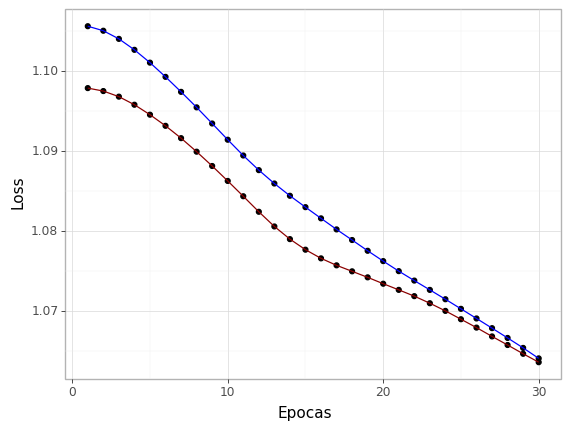

<ggplot: (148715456678)>

In [50]:
(ggplot()
+geom_point(aes(x=np.arange(1, 31), y="loss_train_list"))
+geom_point(aes(x=np.arange(1, 31), y="loss_val_list"))
+geom_line(aes(x=np.arange(1, 31), y="loss_train_list"), color='blue')
+geom_line(aes(x=np.arange(1, 31), y="loss_val_list"), color='darkred')
+labs(x="Epocas", y="Loss")
+theme_light())

## Métricas no conjunto de teste

In [51]:
output = cnn(test_imgs2.float())
pred = torch.max(output, 1)[1].numpy()
#loss = criterion(output, torch.tensor(np.array(test_labels).astype("int64")))

#### Acurácia geral

In [52]:
np.round(np.sum(pred==np.array(test_labels).astype("int64"))/len(pred), 2)

0.45

## Métricas da classe Darth Vader

In [53]:
pos_darth1=np.where(pred==0)[0]
pos_darth2=np.where(np.array(test_labels).astype("int64")==0)[0]

### Precision

In [54]:
np.sum(np.array(test_labels).astype("int64")[pos_darth1]==pred[pos_darth1])/len(pos_darth1)

0.42783505154639173

### Recall

In [55]:
np.sum(np.array(test_labels).astype("int64")[pos_darth2]==pred[pos_darth2])/len(pos_darth2)

0.7904761904761904

## Métricas da classe Stormtrooper

In [56]:
pos_storm1=np.where(pred==1)[0]
pos_storm2=np.where(np.array(test_labels).astype("int64")==1)[0]

### Precision

In [57]:
np.sum(np.array(test_labels).astype("int64")[pos_storm1]==pred[pos_storm1])/len(pos_storm1)

0.5

### Recall

In [58]:
np.sum(np.array(test_labels).astype("int64")[pos_storm2]==pred[pos_storm2])/len(pos_storm2)

0.4020618556701031

## Métricas da classe Yoda

In [59]:
pos_yoda1=np.where(pred==2)[0]
pos_yoda2=np.where(np.array(test_labels).astype("int64")==2)[0]

### Precision

In [60]:
np.sum(np.array(test_labels).astype("int64")[pos_yoda1]==pred[pos_yoda1])/len(pos_yoda1)

1.0

### Recall

In [61]:
np.sum(np.array(test_labels).astype("int64")[pos_yoda2]==pred[pos_yoda2])/len(pos_yoda2)

0.014084507042253521

# Tarefa 5

#### Função de treino para o transfer learning

In [62]:
import copy
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in [next(iter(dataloader_train)), next(iter(dataloader_val))]:
                #inputs = inputs.to(device)
                #labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(labels)
            epoch_acc = running_corrects.double() / len(labels)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [63]:
model_ft = torchvision.models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

In [64]:
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


In [65]:
#Deu erro, nao consegui resolver o problema
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[1258, 1, 140, 140] to have 3 channels, but got 1 channels instead